<a href="https://colab.research.google.com/github/rodrigowe1988/Alura-DAta-Science/blob/main/Introdu%C3%A7%C3%A3o_%C3%A0_Data_Science_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Utilizando a biblioteca Pandas

In [1]:
import pandas as pd

In [2]:
notas = pd.read_csv('/content/ratings.csv')
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
notas.shape

(100836, 4)

In [4]:
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
notas.nota.unique()
#ou também -> notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [6]:
media = notas.nota.mean()
print(f'A média das notas dos filmes listados nesse DF é {media:.2f}.')

A média das notas dos filmes listados nesse DF é 3.50.


In [7]:
notas.nota.value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

Dessa vez, queremos explorar esses mesmos dados, mas de maneira visual. A impressão visual de um conjunto de dados é chamada de "plotar" (plot), e o Pandas possui um método plot() justamente para isso.

Inicialmente, plotaremos nossa série de dados com notas.nota.plot().

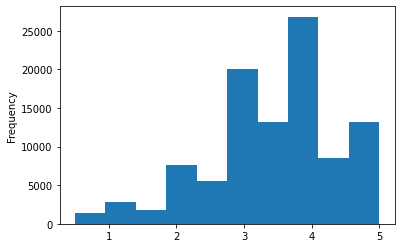

In [8]:
notas.nota.plot(kind='hist')

In [9]:
mediana = notas.nota.median()
mediana

3.5

In [10]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

Temos 100.836 dados:
* a média das notas é 3.501557; 
* o valor mínimo é 0,5; 
* o máximo é 5; 
* a mediana é 3.5; 
* 25% dos dados (um quartil) estão abaixo de 3; 
* e outros 25% estão acima de 4.

##Utilizando a biblioteca Seaborn

In [11]:
import seaborn as sns

Mostrando os valores do describe() acima de uma forma gráfica.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


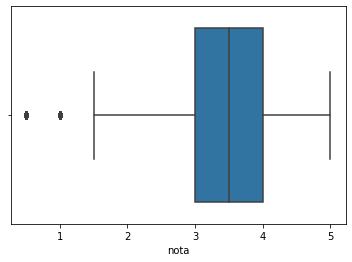

In [12]:
sns.boxplot(notas.nota);

In [13]:
filmes = pd.read_csv('/content/movies.csv')
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


##Analisando algumas notas específicas por filme

In [14]:
#analisando todas as notas dadas ao filme Toy Story e calculando a média delas
notas.query('filmeId==1').nota.mean()

3.9209302325581397

In [15]:
#analisando todas as notas dadas ao filme Jumanji e calculando a média delas
notas.query('filmeId==2').nota.mean()

3.4318181818181817

In [16]:
#agrupar os filmes pelo ID
notas.groupby('filmeId')

Com os dados dos filmes já agrupados pelo ID (filmeId) podemos calcular a média de todos os filmes de uma vez ao invés de fazer esse processo manualmente.

In [17]:
#agrupando as médias das notas por filme e filtrando somente a coluna nota 
#que interessa
medias_por_filme = notas.groupby('filmeId').mean()['nota']
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

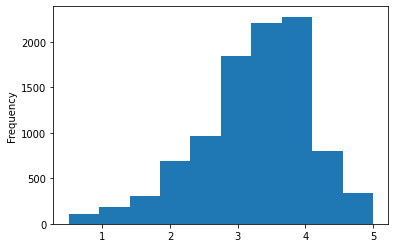

In [18]:
#histograma agora por media
medias_por_filme.plot(kind='hist')

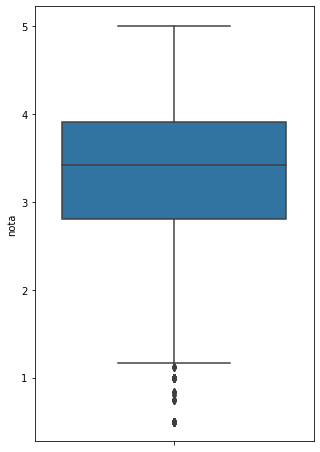

In [19]:
#boxplot das médias dos filmes
import matplotlib.pyplot as plt

plt.figure(figsize=(5,8))
sns.boxplot(y=medias_por_filme);

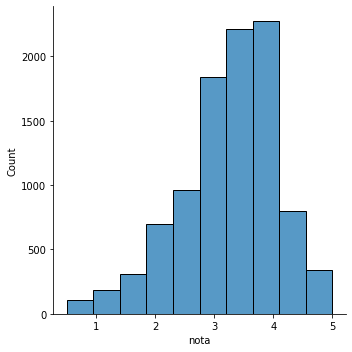

In [20]:
#histograma utilizando o Seaborn
sns.displot(medias_por_filme, bins=10);

## Matplotlib

Para gerar esses gráficos, tanto o Seaborn quanto o Pandas utilizam uma biblioteca de baixo nível, chamada Matplotlib. Podemos, inclusive, importá-la e utilizar a função plt.hist() para plotar nosso histograma na tela:

Text(0.5, 1.0, 'Histograma das médias dos filmes')

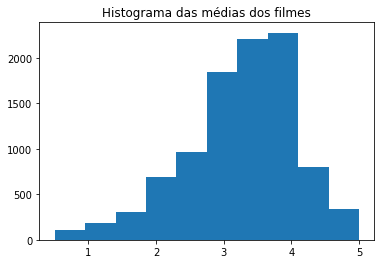

In [21]:
import matplotlib.pyplot as plt

plt.hist(medias_por_filme);
plt.title('Histograma das médias dos filmes')

Utilizaremos nesse momento o conjunto TMDB 5000 Movie Dataset, um dataset hospedado no Kaggle, com informações sobre 5000 filmes.

In [22]:
movie_data = pd.read_csv('/content/tmdb_5000_movies.csv')
movie_data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [23]:
print(f'O dataframe possui {movie_data.shape[0]} linhas e {movie_data.shape[1]} colunas.')

O dataframe possui 4803 linhas e 20 colunas.


In [24]:
movie_data.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [25]:
#5 maiores idiomas em filmes desse dataframe
movie_data.original_language.value_counts().head()

en    4505
fr      70
es      32
zh      27
de      27
Name: original_language, dtype: int64

In [26]:
contagem_de_lingua = movie_data.original_language.value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ['original_language', 'total']
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


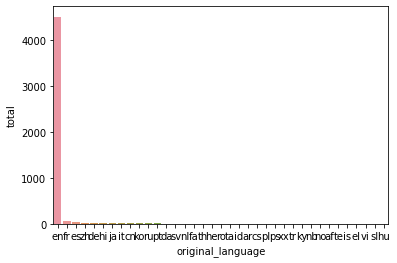

In [27]:
#plotar um gráfico com os dados de contagem de língua divididos nos eixos x e y
sns.barplot(x='original_language', y='total', data=contagem_de_lingua);

No Seaborn, existe uma maneira mais simples de realizarmos essa operação! Além das plotagens de "baixo nível", como o barplot(), que nos fornecem mais controle sobre cada etapa do processo, existem as de mais alto nível, como o catplot(), que realiza uma plotagem baseada em categorias.

Para essa função, passaremos original_language como parâmetro do eixo x, usando como dados (data) a fonte dos nossos dados (tmdb). Já no eixo y, precisamos contar quantas vezes cada língua/categoria aparece. Isso pode ser feito com o argumento kind, que define o tipo de plotagem que queremos utilizar.

Um desses tipos é o count. Dessa forma, iremos plotar categoricamente os nossos elementos, contando quantas vezes eles aparecem no conjunto. Assim, teremos:

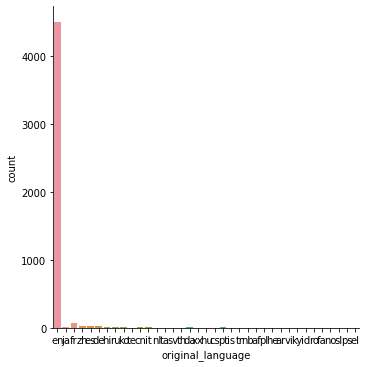

In [28]:
sns.catplot(x="original_language", kind="count", data=movie_data);

In [29]:
print(sns.__version__)

0.11.1


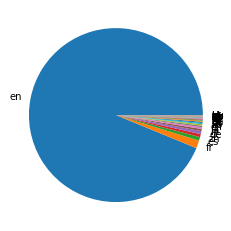

In [30]:
plt.pie(contagem_de_lingua.total, labels = contagem_de_lingua.original_language);

In [31]:
total_por_lingua = movie_data.original_language.value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc['en']
total_do_resto = total_geral - total_de_ingles
total_do_resto

298

Assim, temos duas categorias diferentes: "inglês" e "outros". A ideia agora é criarmos um dataframe com esses valores, de modo que possamos plotá-los em um gráfico.

Começaremos criando dados, um dicionário do Python com duas colunas: lingua, que conterá os valores ingles e outros; e total, com os valores total_de_ingles e total_do_resto.

Em seguida, utilizaremos a função DataFrame() do Pandas, passando dados como parâmetro, para efetivamente criarmos nosso dataframe:

In [32]:
dados = {
    'lingua' : ['ingles', 'outros'],
    'total' : [total_de_ingles, total_do_resto]
}
#sobreescreva a variável dados
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


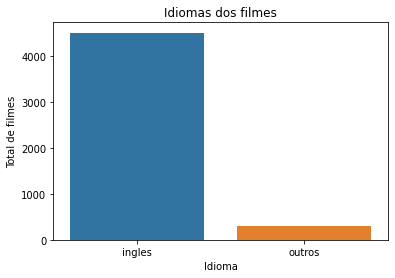

In [33]:
sns.barplot(x='lingua', y='total', data=dados);
plt.title('Idiomas dos filmes');
plt.xlabel('Idioma');
plt.ylabel('Total de filmes');

In [34]:
total_por_lingua_de_outros_filmes = movie_data.query("original_language != 'en'").original_language.value_counts()
total_por_lingua_de_outros_filmes

fr    70
es    32
de    27
zh    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
nl     4
fa     4
th     3
he     3
ta     2
ro     2
ar     2
id     2
cs     2
el     1
no     1
xx     1
ky     1
hu     1
sl     1
vi     1
tr     1
ps     1
pl     1
nb     1
af     1
te     1
is     1
Name: original_language, dtype: int64

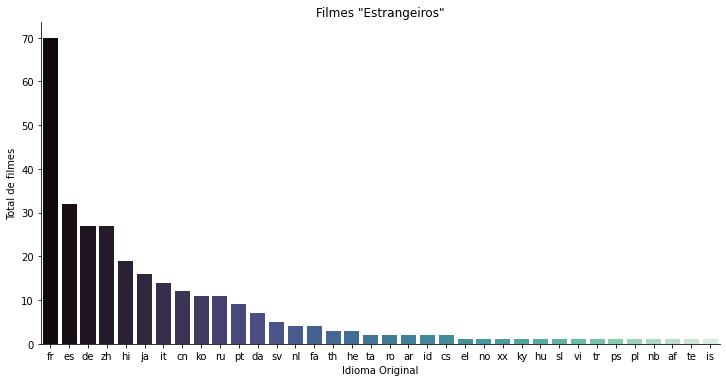

In [35]:
filmes_sem_lingua_original_em_ingles = movie_data.query('original_language != "en"')
sns.catplot(x='original_language', kind='count', data=filmes_sem_lingua_original_em_ingles, 
            aspect=2, 
            palette='mako',
            order=total_por_lingua_de_outros_filmes.index,);
plt.title('Filmes "Estrangeiros"');
plt.xlabel('Idioma Original');
plt.ylabel('Total de filmes');

##Revisando o papel da média, mediana, medidas de tendência central, dispersão, desvio padrão, boxplot, histograma

In [36]:
#extrair dados dos dois primeiros filmes do dataframe
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [37]:
notas_toy_story = notas.query('filmeId==1')
notas_jumanji = notas.query('filmeId==2')
print(f'Número de notas do filme Toy Story: {len(notas_toy_story)} e do filme Jumanji: {len(notas_jumanji)}.')
print(f'A média das notas do Toy Story é {notas_toy_story.nota.mean():.2f} pontos.')
print(f'A média das notas do Jumanji é {notas_jumanji.nota.mean():.2f}.')

Número de notas do filme Toy Story: 215 e do filme Jumanji: 110.
A média das notas do Toy Story é 3.92 pontos.
A média das notas do Jumanji é 3.43.


In [44]:
#trabalhando com médias, mediana, desvio padrão,...
import numpy as np
array_teste1 = np.array([2.5] * 10)
array_teste2 = np.array([3.5] * 10)

filme1 = np.append(array_teste1, array_teste2)
filme1.mean(), np.median(filme1)

(3.0, 3.0)

In [39]:
filme2 = np.append(np.array([5] * 10), np.array([1] * 10))

In [40]:
filme2.mean(), np.median(filme2)

(3.0, 3.0)

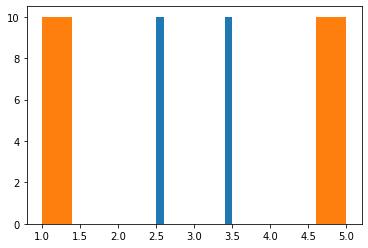

In [46]:
plt.hist(filme1);
plt.hist(filme2);

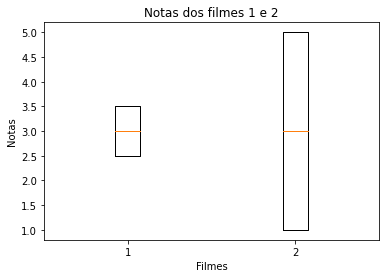

In [54]:
plt.boxplot([filme1, filme2]);
plt.xlabel('Filmes');
plt.ylabel('Notas');
plt.title('Notas dos filmes 1 e 2');

In [69]:
#desvio padrão dos filmes 1 e 2
print(f'O desvio padrão do filme1 é {np.std(filme1)} e do filme2 é {np.std(filme2)}.')

O desvio padrão do filme1 é 0.5 e do filme2 é 2.0.


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


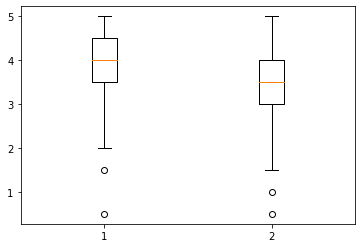

In [62]:
plt.boxplot([notas_toy_story.nota, notas_jumanji.nota]);

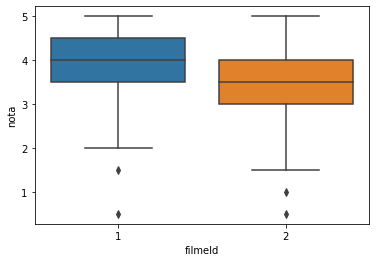

In [67]:
sns.boxplot(x='filmeId', y ='nota', data=notas.query('filmeId in [1,2]'));